## Sentiment Analysis on newly released movie 
By I Nengah Dharma Pradnyandita 

Import Library

In [1]:
#Import the following libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

Import Dataset

In [2]:
df= pd.read_csv('Dune_movie_review.csv')

In [13]:
df.tail(3)

,review-data href,audience-reviews__name,audience-reviews__name href,audience-reviews__duration,audience-reviews__review
1017,https://www.rottentomatoes.com/profiles/OGquBV...,bpinsker1 P,https://www.rottentomatoes.com/profiles/OGquBV...,"Mar 23, 2024",This may very well go down as one of the great...
1018,NaN,Movie critic,NaN,"Mar 23, 2024",Well done but pretty boring. Maybe you had to ...
1019,https://www.rottentomatoes.com/profiles/MlYco0...,Edwin Emilio B,https://www.rottentomatoes.com/profiles/MlYco0...,"Mar 23, 2024","No soy fan de esta saga, me gustó ver la prime..."


,review-data href,audience-reviews__name,audience-reviews__name href,audience-reviews__duration,audience-reviews__review
0,https://www.rottentomatoes.com/profiles/m8mTOQ...,Scott B,https://www.rottentomatoes.com/profiles/m8mTOQ...,"Apr 25, 2024","This movie is a stunning, visual masterpiece. ..."
1,https://www.rottentomatoes.com/profiles/1KVSeO...,alan t,https://www.rottentomatoes.com/profiles/1KVSeO...,"Apr 25, 2024",Seen all this before. Star Wars in the desert....
2,https://www.rottentomatoes.com/profiles/pZKsMJ...,Drew F,https://www.rottentomatoes.com/profiles/pZKsMJ...,"Apr 25, 2024",Zpoiler Alert: Wonka helps save the Universe f...
3,https://www.rottentomatoes.com/profiles/r8WSOL...,Campolongo C,https://www.rottentomatoes.com/profiles/r8WSOL...,"Apr 25, 2024",Question: Is Denis Villeneuve the most overrat...
4,https://www.rottentomatoes.com/profiles/AlPH2o...,Nicholas S,https://www.rottentomatoes.com/profiles/AlPH2o...,"Apr 24, 2024",Honestly I enjoyed the first more. They are bo...
...,...,...,...,...,...
1015,NaN,NaN,NaN,"Mar 23, 2024",Oh my god literally a cinematic masterpiece.
1016,NaN,Nadine,NaN,"Mar 23, 2024",Excellent! I could've kept watching for 2 more...
1017,https://www.rottentomatoes.com/profiles/OGquBV...,bpinsker1 P,https://www.rottentomatoes.com/profiles/OGquBV...,"Mar 23, 2024",This may very well go down as one of the great...
1018,NaN,Movie critic,NaN,"Mar 23, 2024",Well done but pretty boring. Maybe you had to ...


Data Preprocessing 

In [8]:
#Make Unique ID
import uuid
id = uuid.uuid1()
print(id.int)

314399030911839970707690088413066291821


In [17]:
columns = ['reviewerID','reviewerName','reviewText','sentiment']
review_properties = []
for index,review in df.tail(300).iterrows() :
  properties =[]
  id = uuid.uuid1()
  properties.append(id)
  properties.append(review['audience-reviews__name'])
  review_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",review['audience-reviews__review']).split())
  properties.append(review_bersih)
  review_properties.append(properties)
  analisis = TextBlob(review_bersih)
  if analisis.sentiment.polarity >0.0:
    properties.append("positif")
  elif analisis.sentiment.polarity ==0.0:
    properties.append("netral")
  else:
    properties.append("negatif")
    # print(tweet_properties)
dr = pd.DataFrame(data=review_properties,columns = columns)

In [18]:
dr

,reviewerID,reviewerName,reviewText,sentiment
0,b00bf5ec-02f7-11ef-9652-88d7f6d9ea6d,Nicholas,If you liked part one you won t be disappointed,negatif
1,b00c1ce5-02f7-11ef-98fa-88d7f6d9ea6d,Sharon L,Did not like the dark turn that the movie took...,negatif
2,b00c43d8-02f7-11ef-a06f-88d7f6d9ea6d,Matthew,Wonderful movie Cinematography was on par with...,positif
3,b00c91ca-02f7-11ef-b5bf-88d7f6d9ea6d,Pork C,Incredible if you dont see this in an IMAX you...,positif
4,b00ce6be-02f7-11ef-9f77-88d7f6d9ea6d,Matt,Refreshing to finally see a movie in Imax wort...,positif
...,...,...,...,...
295,b035015b-02f7-11ef-ae8a-88d7f6d9ea6d,NaN,Oh my god literally a cinematic masterpiece,netral
296,b035015c-02f7-11ef-aef6-88d7f6d9ea6d,Nadine,Excellent I could ve kept watching for 2 more ...,positif
297,b035015d-02f7-11ef-9bc4-88d7f6d9ea6d,bpinsker1 P,This may very well go down as one of the great...,positif
298,b0352850-02f7-11ef-bc7d-88d7f6d9ea6d,Movie critic,Well done but pretty boring Maybe you had to h...,negatif


sentiment
positif    259
negatif     26
netral      15
Name: reviewerID, dtype: int64


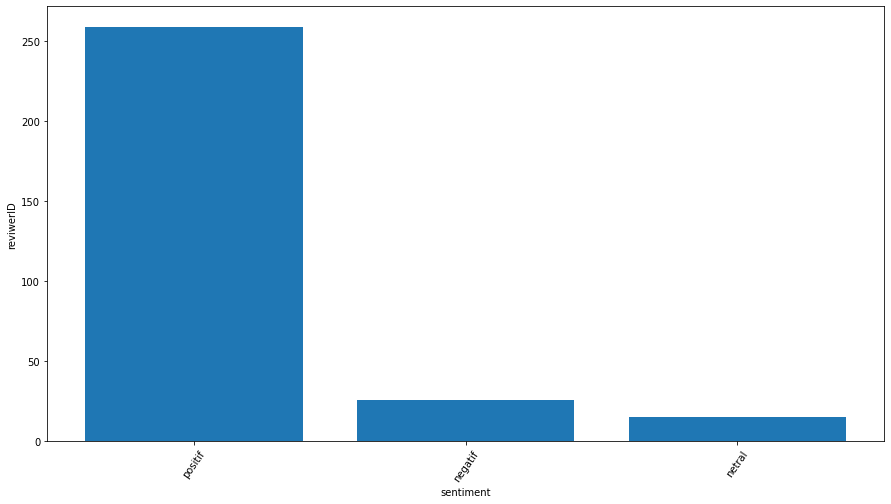

In [25]:
bar = dr.groupby('sentiment').count()['reviewerID'].sort_values(ascending=False)
print(bar)
plt.figure(figsize=(15, 8))
plt.bar(bar.index, bar)
plt.xticks(rotation=55)
plt.xlabel('sentiment')
plt.ylabel('reviwerID')
plt.show()
